In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

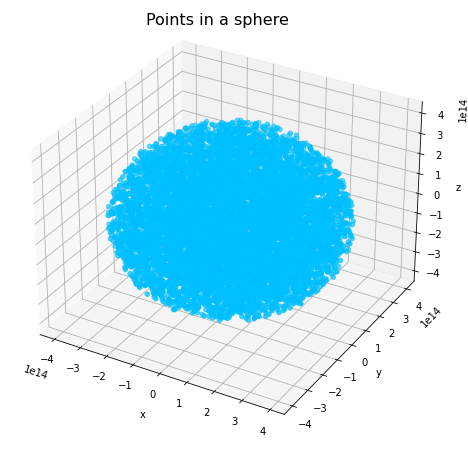

In [2]:

################################################################################################################

N = 10000 #number of points
a = 40*10**13  #radius of the sphere
t_in = 0
m = 10**31
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)
### FUNCTIONS ##################################################################################################

def r(P, a) :
    return (P * a**3)**(1/3)

def theta(P) :
    return np.arccos(1 - 2*P)

def phi(P) :
    return 2 * np.pi * P

################################################################################################################


# random generated P
# three different ones in order not to be correlated
Pr = np.random.uniform(0, 1, N)
Ptheta = np.random.uniform(0, 1, N)
Pphi = np.random.uniform(0, 1, N)

# polar coordinates
r = r(Pr, a)
theta = theta(Ptheta)
phi = phi(Pphi)

'''
theta=np.arccos(np.random.uniform(-1,1,N))   # Polar
phi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
psi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
#iota = np.arccos(np.random.uniform(-1,1,mcn))  # Polar 
'''

# cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

In [3]:
sphere = open("sphere.in", "w")

#sphere.write(str(N) + "\n"+ str(t_in) + "\n")

for i in range(N):
    sphere.write(str(m) + " "+ str(x[i])+ " " + str(y[i])+ " " + str(z[i])+ " " + str(v_x[i])+ " " + str(v_y[i])+ " " + str(v_z[i]))
    if (i != N):
        sphere.write("\n")
sphere.close()
#print(sphere.read())



# Let's do the conversion in internal units 

\begin{equation}
\frac{G_{physical} M_{physical}}{R_{physical} v^2_{physical}} = \frac{G_{internal} M_{internal}}{R_{internal} v^2_{internal}}
\end{equation}

but 
\begin{equation}
G_{internal} = 1
\end{equation}

so

\begin{equation}
G_{physical} = \frac{ \frac{R_{internal} }{ R_{physical}} \frac{ v^2_{physical} }{ v^2_{internal} }} { \frac{M_{physical} } {M_{internal}}}
\end{equation}



In [4]:
G_cgs = 6.67259 * 10**-8 #G in cgs
M_sun = 1.9891 * 10**33 #solar mass in g
R_sun = 6.9598 * 10**10 #solar radius in cm 
M_earth = 5.976 * 10**27 #earth mass in g
R_earth = 6.378 * 10**8 #earth radius in cm
ly = 9.463 * 10**17 #light year in cm
parsec = 3.086 * 10**18 #parsec in cm
AU = 1.496 * 10**13 #astronomical unit in cm

a_IU = a / parsec
m_IU = m / M_sun


def v_IU(M_cgs, r_cgs, v_cgs):
    return np.sqrt(r_cgs/(G_cgs*M_cgs))*v_cgs

def t_IU(M_cgs, r_cgs, t_cgs):
    return t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

print("We choose 1 solar mass as mass unit and 1 parsec unit as distance unit.")
print("200 km/s expressed in internal units is: %f" % (v_IU(M_sun,parsec,26.22*10**5)))
print("1 Myr expressed in internal units is: %f" % (t_IU(M_sun,parsec,3.156*10**13)))
print("1 time unit expressed in cgs is: %f Myrs" % (t_IU(M_sun,parsec,3.156*10**13)))


We choose 1 solar mass as mass unit and 1 parsec unit as distance unit.
200 km/s expressed in internal units is: 399.811350
1 Myr expressed in internal units is: 0.067069
1 time unit expressed in cgs is: 0.067069 Myrs


# period, dynamical time, collapse time

In [5]:
rho_IU = N* m_IU / (4/3 * np.pi * (a_IU)**3 ) # mass / volume SHOULD THIS BE DONE IN INTERNAL UNITS???
rho = N * m / (4/3 * np.pi * (a)**3 )

#v_IU = np.sqrt(a/(G*m))*v
#t_IU = t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

#period_1orbit= 2*np.pi*a / 

dyn_time = np.sqrt(3* np.pi /(16 * G_cgs * rho))
collapse_time = dyn_time / np.sqrt(2)

#internal units

dyn_time_IU = np.sqrt(3* np.pi /(16 * rho_IU))
collapse_time_IU = dyn_time_IU / np.sqrt(2)


print(dyn_time, collapse_time, )

print("Free fall time is %f in internal units, %f Myr" %(collapse_time_IU, collapse_time_IU*0.067069))
print("Run:  ./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t %f < initial_conditions.in > output.out  to cover at least 1 free fall time." %collapse_time)



153837652.4161481 108779647.22527738
Free fall time is 0.000000 in internal units, 0.000000 Myr
Run:  ./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t 108779647.225277 < initial_conditions.in > output.out  to cover at least 1 free fall time.


# density

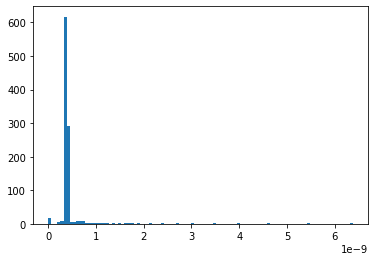

In [6]:
#density = N * m / (4/3 * np.pi * a**3)

#avrebbe senso vedere profilo di densità a t = 0 e poi...

radii = np.linspace(0.1, a, 1000)
#print(radii)
density= []
for R in radii:
    i = 0
    for r_p in r:    
        if (r_p <= R):
            i = i+1
        
    density.append(i * m / (4/3 * np.pi * R**3)) 
    
#print(density)

#plt.plot(radii, density)
#density = N[r] * m / (4/3 * np.pi * r**3)

plt.hist(density,100)
plt.show()




 # visualization

#plot orbita ellitica 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

dati=np.genfromtxt('output_converted.txt', delimiter=' ', usecols=range(1,3), invalid_raise=False)

dati_1=dati[::2]
dati_2=dati[1::2]

i=0
while i<len(dati_1):
    plt.scatter(dati_1[i,0], dati_1[i,1], color="blue")
    plt.scatter(dati_2[i,0], dati_2[i,1], color="red")
    i=i+1


dati=np.genfromtxt('output.out', delimiter=' ', usecols=range(1,3), invalid_raise=False)

dati_1=dati[::2]
dati_2=dati[1::2]

print(dati.shape)

In [43]:
f = open("output.out", "r")
lines = f.readlines()
print(len(lines))

elements= []
for line in lines:
    elements = np.append(elements, [line.split()])
print (len(elements))

n_bodies = int(lines[0])
n_timelapses = int(len(lines) / (2+n_bodies))
print(n_timelapses)

if (n_timelapses != N):
    print ("ATTENTION YOU ARE NOT READING THE OUTPUT FILE OF THE POINTS WE HAVE JUST GENERATED")

20200
140200
100
ATTENTION YOU ARE NOT READING THE OUTPUT FILE OF THE POINTS WE HAVE JUST GENERATED


In [44]:
#timelapse = [["n_bodies","time", "1", "x", "y", "z", "vx", "vy", "vz"]]
timelapse = []
#print(timelapse)
   
event = 0

for i in range(n_timelapses):
    array = elements[event :(event + 2 + (n_bodies*1) +(n_bodies*6))]
    #print(array)
    timelapse.append(array)
    event = event + 2 + (n_bodies*1) + n_bodies*6


timelapse = np.array(timelapse, dtype = 'float')

print (timelapse.shape) #non sono troppo convinta sia giusto.. per ogni timelapse dovrei avere: n bodies, time e poi 7 valori * particelle.... AH FORSE È GIUSTO

#print(timelapse[1])
#print(lines)

(100, 1402)


In [85]:
#time = timelapse[0][1]

print(n_bodies)
#matrice con n_bodies righe e la posizione x del relativo bodie sulla colonna
time = np.empty(n_timelapses)
x_evolution = np.empty((n_bodies, n_timelapses))
y_evolution = np.empty((n_bodies, n_timelapses))
z_evolution = np.empty((n_bodies, n_timelapses))
v_x_evolution = np.empty((n_bodies, n_timelapses))
v_y_evolution = np.empty((n_bodies, n_timelapses))
v_z_evolution = np.empty((n_bodies, n_timelapses))

'''
#prima prendiamo la posizione iniziale
for n in range(n_bodies):
    x[n][0] = timelapse[0][7*n+3]
    y[n][0] = timelapse[0][7*n+4]
    z[n][0] = timelapse[0][7*n+5]
    v_x[n][0] = timelapse[0][7*n + 6]
    v_y[n][0] = timelapse[0][7*n + 7]
    v_z[n][0] = timelapse[0][7*n + 8]    

print(x.shape) 
'''    
for i in range(n_timelapses):
    time[i] = timelapse[i][1]
    #print(i)
    
    for n in range(n_bodies):
        #print(n)
        x_evolution[n][i] = timelapse[i][7*n+3]
        y_evolution[n][i] = timelapse[i][7*n+4]
        z_evolution[n][i] = timelapse[i][7*n+5]
        v_x_evolution[n][i] = timelapse[i][7*n + 6]
        v_y_evolution[n][i] = timelapse[i][7*n + 7]
        v_z_evolution[n][i] = timelapse[i][7*n + 8]  
        
print(x.shape)



200
(200, 100)


# plot 

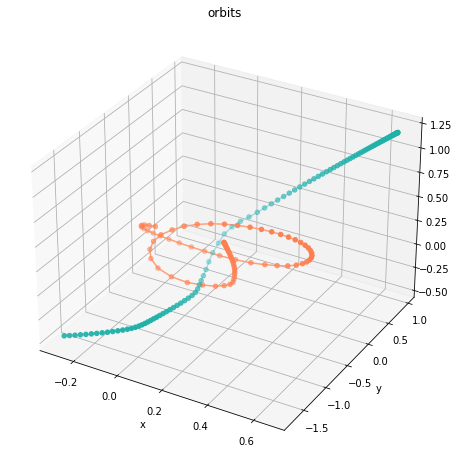

In [86]:
#PLOTTING JUST THE FIRST TWO TO SEE IF IT MAKES SENSE


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#IF I WANT POINTS:

ax.scatter(x_evolution[0][:],y_evolution[0][:],z_evolution[0][:], color = 'lightseagreen')
ax.scatter(x_evolution[1][:],y_evolution[1][:], z_evolution[1][:], color = 'coral')

#IF I WANT THE PLOT OF THE ORBITS
ax.plot(x_evolution[0], y_evolution[0], z_evolution[0], label='1', color = 'lightblue')
ax.plot(x_evolution[1], y_evolution[1], z_evolution[1], label='2', color = 'lightsalmon')
#plt.plot(x3, y3, label='3', color = 'blue')


ax.set_title('orbits')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.grid(True)
#ax.legend()
plt.show()



#MAYBE I SHOULD DO IT IN 3D

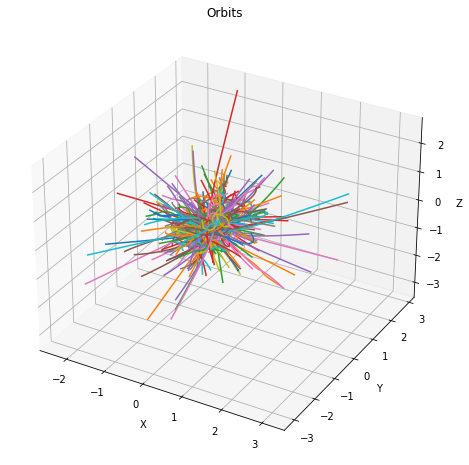

"\nplt.figure(figsize=(10, 8))\n\nfor n in range(n_bodies):\n    #IF I WANT POINTS:\n    #plt.scatter(x[n][:],y[n][:])\n    #IF I WANT THE PLOT OF THE ORBITS\n    plt.plot(x[n], y[n])\n\nplt.title('orbits')\nplt.xlabel('x')\nplt.ylabel('y')\n#plt.gca().set_aspect('equal', adjustable='box')\nplt.grid(True)\n#plt.legend()\nplt.show()\n"

In [87]:
#ALL THE ORBITS


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for orbit_x, orbit_y, orbit_z in zip(x_evolution, y_evolution, z_evolution):
    ax.plot(orbit_x, orbit_y, orbit_z)

ax.set_title('Orbits')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


'''
plt.figure(figsize=(10, 8))

for n in range(n_bodies):
    #IF I WANT POINTS:
    #plt.scatter(x[n][:],y[n][:])
    #IF I WANT THE PLOT OF THE ORBITS
    plt.plot(x[n], y[n])

plt.title('orbits')
plt.xlabel('x')
plt.ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
#plt.legend()
plt.show()
'''

# now let's do some physics

## let's check that the density profile stayse the same

In [88]:
#density = N * m / (4/3 * np.pi * a**3)

#avrebbe senso vedere profilo di densità a t = 0 e poi...

radii = np.linspace(0.1, a, 1000)
#print(radii)
density= []
for R in radii:
    i = 0
    for r_p in r:    
        if (r_p <= R):
            i = i+1
        
    density.append(i * m / (4/3 * np.pi * R**3)) 
    
#print(density)

#plt.plot(radii, density)
#density = N[r] * m / (4/3 * np.pi * r**3)

plt.hist(density,int(n_bodies**0.5))
plt.show()




ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## rho evolution

(200, 100)
I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units


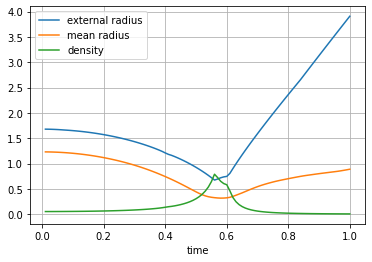

In [112]:
#I want to do a matrix with the radii of each n particle at each time
#x[0][:] is all the positions of the body 0

#print(x[0][:])
#print((x[0][:])**2)
#print((x**2).shape)
r_evolution = np.empty((n_bodies, n_timelapses))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO
r_ext = np.max(r_evolution, axis = 0)
r_mean = np.mean(r_evolution, axis = 0)
rho_evolution = n_bodies * m_IU / (4/3 * np.pi * (r_ext)**3 )

plt.plot(time, r_ext, label = 'external radius')
plt.plot(time, r_mean, label = 'mean radius')
plt.plot(time, rho_evolution, label = 'density')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()

print("I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units")



## rho profile at each timelapse

In [121]:
print(r_evolution.shape)
print(r_evolution[:,0].shape)


(200, 100)
(200,)


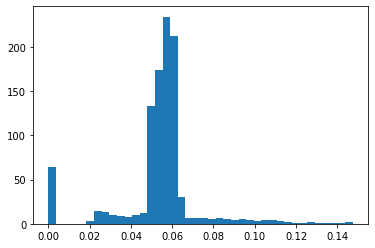

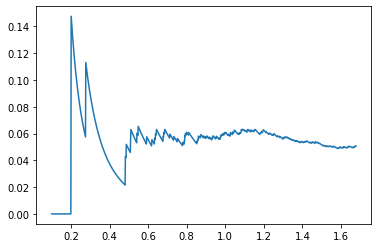

In [157]:
#let's do the first one first
radii = np.linspace(0.1, r_ext[0], 1000)
density= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    density.append(i * m_IU / (4/3 * np.pi * R**3)) 
plt.hist(density,int(n_bodies**0.7))
plt.show()
plt.plot(radii, density)

plt.show()


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


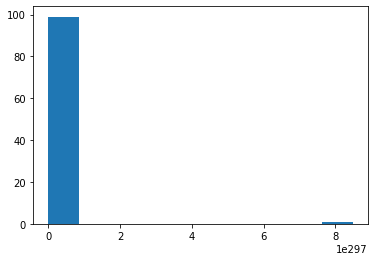

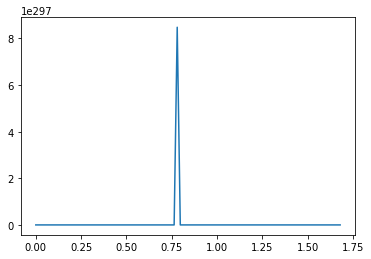

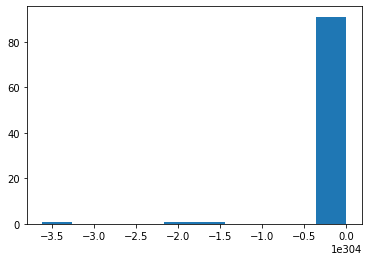

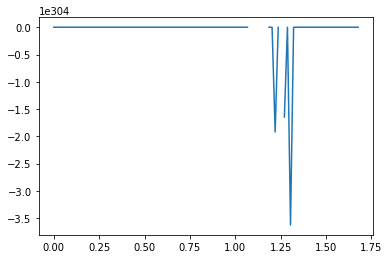

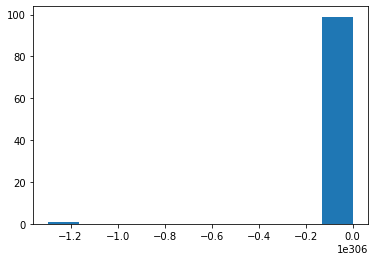

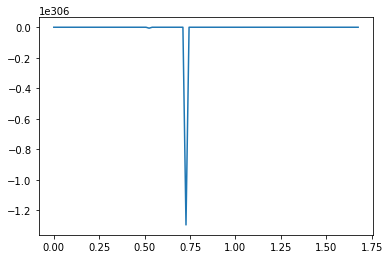

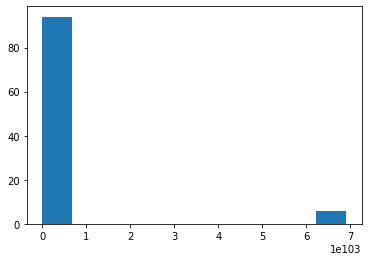

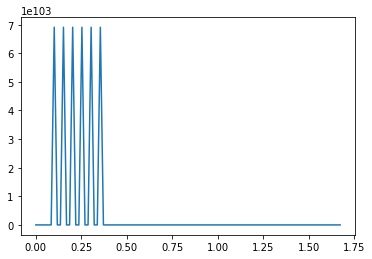

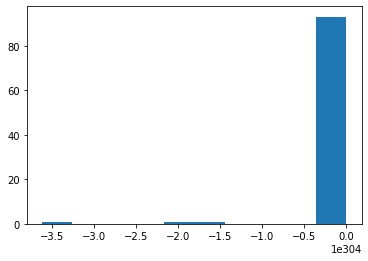

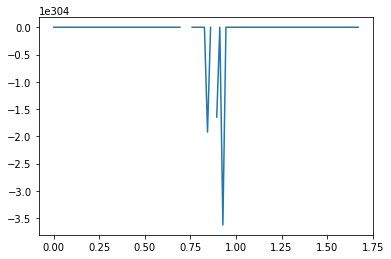

In [172]:
#cicle over the timelapses:
frames = 5 #if I want to see the profiles of 5 frames
spacing = 100
density = np.empty((frames, spacing))

for t in range(frames):
    
    radii = np.linspace(0 , r_ext[t], spacing)
    
    for R in radii:
        point = 0
        i = 0
        for r_p in r_evolution[:,t]:    
            if (r_p <= R):
                i = i+1
        density[t,point] = (i * m_IU / (4/3 * np.pi * R**3)) 
        point = point + 1
       
    
    plt.hist(density[t,:],int(spacing**0.5))
    plt.show()
    plt.plot(radii, density[t,:])
    plt.show()

# VAFFANBRODO CALCOLA MALE LA DENSITY, NON SO PERCHÈ

In [163]:
print(density.shape)
print(density[0,:], density[0][:])


(5, 100)
[5.07578223e-002 6.79827417e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310 5.18218092e-310 5.18218092e-310 5.18218092e-310
 5.18218092e-310

plt.hist(density[t],int(n_bodies**0.5))
plt.show()
plt.plot(radii[t], density[t])
plt.show()


In [ ]:
o = 5
for i in range(o):
    n = int(len(radius_at_given_frame)/o)
    R_max = max(radius_at_given_frame[i*n])
    radii = np.linspace(0.1, R_max, 1000)
    density= []
    for R in radii:
        j = 0
        for r_p in radius_at_given_frame[i*n]:    
            if (r_p <= R):
                j = j+1 
        density.append(j * m / (4/3 * np.pi * R**3)) 
    plt.hist(density, bins = int(np.round(len(density)**0.5)), density = True, histtype="step", label = 'Time = %f' % (t[i*n]))
plt.legend() 
#plt.xlim(-0.1,0.5)
plt.show()

In [16]:
sphere_converted = open("sphere_converted.in", "r")
mass_c, x_c, y_c, z_c, vx_c, vy_c, vz_c = np.loadtxt("sphere_converted.in", delimiter=" ", comments="#", dtype="float").T
print(len(mass_c))

#print(sphere_converted.read())


1000


In [15]:
#we can choose the units we want to use....
# I can either fix: G (=1 always), M and r, OR : G(=1 always), M, v

G = 6.674e-11 #N⋅m2/kg2 or 6.674 * 10**(-8) in cgs
starting_time = 0       #starting time added to the input_converted file
center_of_mass = 0      #set this to True if you want the coordinates to be in the center of mass

#mass is always set (we can change it in the future but I think it's the simplest way)
#now we are left with radius and velocity

set_radius = True       #if this is True the radius will be set to 1 ua (which can be changed in the code). Then the velocity will be calculated accordingly (to get G=1)
#if this is False the velocity will be set to the velocity of earth and the radius will be calculated accordingly




mass = []
x = []
y = []
z = []
vx =[]
vy = []
vz = []
r = []

mass, x, y, z, vx, vy, vz = np.loadtxt("sphere.in", delimiter=" ", comments="#", dtype="float").T
number_of_bodies = len(mass)

mass_x = [a * b for a, b in zip(mass, x)]      #mass times coordinate x
mass_y = [a * b for a, b in zip(mass, y)]      #mass times coordinate y
mass_z = [a * b for a, b in zip(mass, z)]      #mass times coordinate z
mass_vx = [a * b for a, b in zip(mass, vx)]      #mass times coordinate vx
mass_vy = [a * b for a, b in zip(mass, vy)]      #mass times coordinate vy
mass_vz = [a * b for a, b in zip(mass, vz)]      #mass times coordinate vz

cm_x = np.sum(mass_x)/sum(mass)
cm_y = np.sum(mass_y)/sum(mass)
cm_z = np.sum(mass_z)/sum(mass)
cm_vx = np.sum(mass_vx)/sum(mass)
cm_vy = np.sum(mass_vy)/sum(mass)
cm_vz = np.sum(mass_vz)/sum(mass)

print(len(mass))

#mass_internal = mass[0]     #use the first mass as unit, you can choose another one
mass_internal = 1.98892 *10**33 # g 1 solar mass as internal unit

if set_radius == True:
    r_internal = 14959787070000   #circa 10**13 cm, 1 ua, you can change this to be anything (but 0)
    v_internal = np.sqrt(G*mass_internal/r_internal)

else:
    v_internal =  2978480   #cm/s more or less the velocity of the earth around the sun... we can change it
    r_internal = G*mass_internal/v_internal**2

t_internal = r_internal/v_internal


new_mass = mass/mass_internal

if center_of_mass == True:
    new_x = (x-cm_x)/r_internal
    new_y = (y-cm_y)/r_internal
    new_z = (z-cm_z)/r_internal
    new_vx = (x-cm_vx)/v_internal
    new_vy = (x-cm_vy)/v_internal
    new_vz = (x-cm_vz)/v_internal
else:
    new_x = x/r_internal
    new_y = y/r_internal
    new_z = z/r_internal
    new_vx = vx/v_internal
    new_vy = vy/v_internal
    new_vz = vz/v_internal



with open("sphere_converted.in", "w") as f:     #file ready to be given to the C code
    print(number_of_bodies, starting_time, sep="\n", file=f)
    np.savetxt(f, np.column_stack([new_mass, new_x, new_y, new_z, new_vx, new_vy, new_vz]), delimiter=" ")

    


1000
